In [1]:
pip install pandas plotly ipywidgets voila

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


# 📊 UOP Library Dashboard
### 📅 Date: 2025-03-27
### 👥 Total Visitors Today: 479


### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone – shows how busy each area is.
- **Chart 2:** Seat Utilization – proportion of seats in use in each zone.
- **Chart 3:** Available Seats – how many seats are still open for new visitors (corrected for no negatives).
- **Chart 4:** Visitors vs Occupancy – visualizes visitor load vs seating, with bubble size showing seat usage rate.


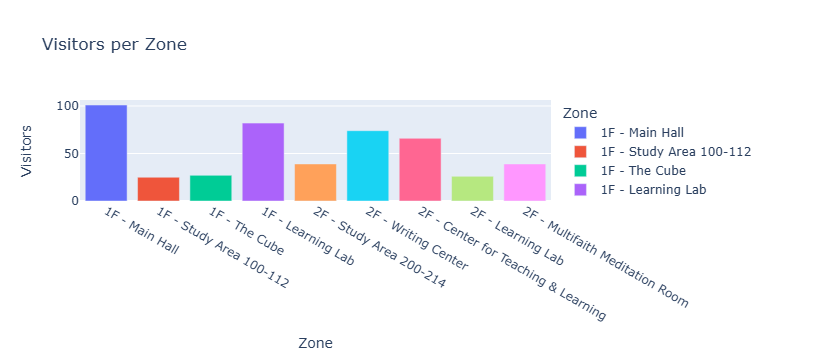

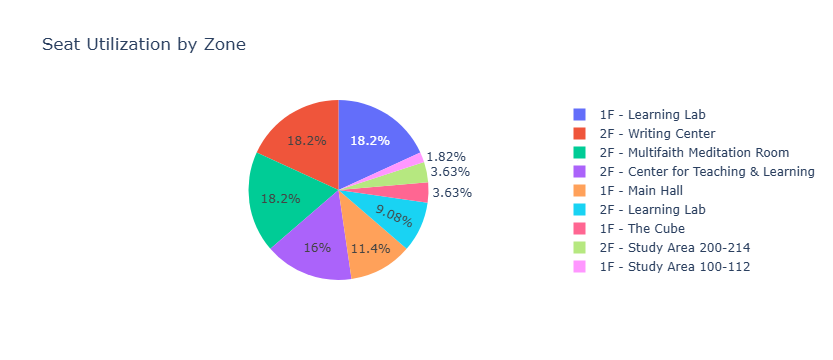

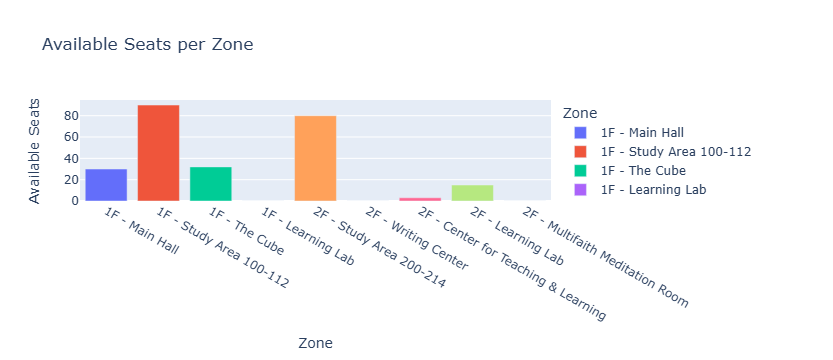

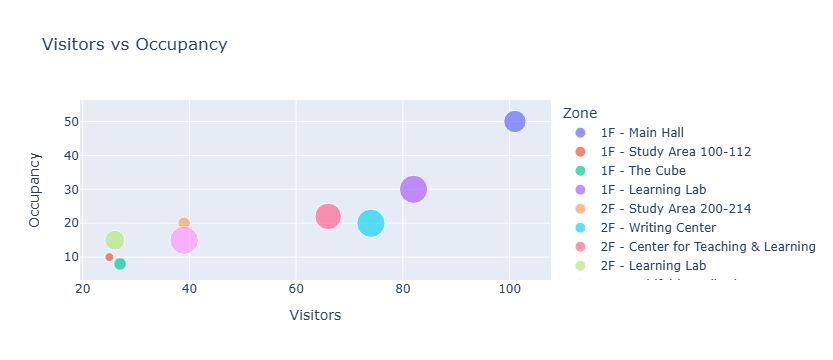

interactive(children=(Dropdown(description='Select Zone', options=('1F - Main Hall', '1F - Study Area 100-112'…

<function __main__.show_area_detail(selected_area)>

In [3]:
# 📊 UOP Library Dashboard (Based on Floor Maps)

import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, Markdown, HTML
import random
from datetime import datetime

# Define library zones by floor and function
areas = [
    '1F - Main Hall',
    '1F - Study Area 100-112',
    '1F - The Cube',
    '1F - Learning Lab',
    '2F - Study Area 200-214',
    '2F - Writing Center',
    '2F - Center for Teaching & Learning',
    '2F - Learning Lab',
    '2F - Multifaith Meditation Room'
]

today = datetime.now().strftime('%Y-%m-%d')

# Simulate data
data = {
    'Date': [today] * len(areas),
    'Zone': areas,
    'Visitors': [random.randint(20, 120) for _ in areas],
    'Total Seats': [80, 100, 40, 30, 100, 20, 25, 30, 15]
}

df = pd.DataFrame(data)
df['Available Seats'] = df['Total Seats'] - df['Visitors'].apply(lambda x: int(x * random.uniform(0.3, 0.7)))
df['Available Seats'] = df['Available Seats'].apply(lambda x: max(x, 0))  # Prevent negative values

df['Utilization (%)'] = ((df['Total Seats'] - df['Available Seats']) / df['Total Seats'] * 100).round(1)
df['Occupancy'] = df['Total Seats'] - df['Available Seats']

# Total visitor count
total_visits = df['Visitors'].sum()

# Display title and summary info
display(Markdown(f"# \U0001F4CA UOP Library Dashboard\n### \U0001F4C5 Date: {today}\n### \U0001F465 Total Visitors Today: {total_visits}"))

# Layout intro text
display(Markdown("""
### 📈 Dashboard Charts Explained:
- **Chart 1:** Visitors per Zone – shows how busy each area is.
- **Chart 2:** Seat Utilization – proportion of seats in use in each zone.
- **Chart 3:** Available Seats – how many seats are still open for new visitors (corrected for no negatives).
- **Chart 4:** Visitors vs Occupancy – visualizes visitor load vs seating, with bubble size showing seat usage rate.
"""))

# Chart 1: Visitors per zone
fig1 = px.bar(df, x='Zone', y='Visitors', title="Visitors per Zone", color='Zone', height=350)
fig1.show()

# Chart 2: Seat utilization rate (pie)
fig2 = px.pie(df, names='Zone', values='Utilization (%)', title="Seat Utilization by Zone")
fig2.show()

# Chart 3: Available seats per zone
fig3 = px.bar(df, x='Zone', y='Available Seats', title="Available Seats per Zone", color='Zone', height=350)
fig3.show()

# Chart 4: Occupancy comparison
fig4 = px.scatter(df, x='Visitors', y='Occupancy', size='Utilization (%)', color='Zone', title="Visitors vs Occupancy")
fig4.show()

# Dropdown for zone detail view
dropdown = widgets.Dropdown(options=areas, description="Select Zone")

def show_area_detail(selected_area):
    area_data = df[df['Zone'] == selected_area].iloc[0]
    display(Markdown(f"""
### \U0001F4CD Zone: {selected_area}
- \U0001F465 Current Visitors: **{area_data['Visitors']}**
- \U0001F9F4 Total Seats: **{area_data['Total Seats']}**
- ✅ Available Seats: **{area_data['Available Seats']}**
- \U0001F501 Utilization Rate: **{area_data['Utilization (%)']}%**
"""))

widgets.interact(show_area_detail, selected_area=dropdown)
